# <span style='font-size:50px;background-color:yellow;'>&#128201;</span> <font color="#004080"> *MNIST digit classification (Using Tensorflow or Keras) ::* </font>


### (a) MNIST is a database of hand written images. Download MNIST data using the built-in functions in Tensorflow or Keras --> 

In [0]:
#Required packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 15s 1us/step


In [0]:
print("Shape of X_train : {}".format(np.shape(X_train)))
print("Shape of Y_train : {}".format(np.shape(Y_train)))

Shape of X_train : (60000, 28, 28)
Shape of Y_train : (60000,)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
print("Shape of X_train after reshaping: {}".format(np.shape(X_train)))
print("Shape of X_test after reshaping: {}".format(np.shape(X_test)))

Shape of X_train after reshaping: (60000, 784)
Shape of X_test after reshaping: (10000, 784)


<br><br><br><br><br>
### (b) Get the training, validation and test data sets using the functions in Tensorflow or Keras. If you are using Tensorflow, the dataset is already split into training set of size 55000, validation set of size 5000, and test set of size 10000. If you are using Keras, the data set is split into training set of size 60000, and validation set of size 10000. Then create a validation set of size 5000 from the training set -->

In [0]:
#shuffling the training dataset and creating validation dataset
new_indices = np.arange(0, X_train.shape[0])
np.random.shuffle(new_indices)

X_new = X_train[new_indices,:]
Y_new = Y_train[new_indices]

X_train = X_new[:55000]
Y_train = Y_new[:55000]
X_val = X_new[55000:]
Y_val = Y_new[55000:]

print("Final shapes -->")
print("Shape of X_train : {}".format(np.shape(X_train)))
print("Shape of Y_train : {}".format(np.shape(Y_train)))
print("Shape of X_test : {}".format(np.shape(X_test)))
print("Shape of Y_test : {}".format(np.shape(Y_test)))
print("Shape of X_val : {}".format(np.shape(X_val)))
print("Shape of Y_val : {}".format(np.shape(Y_val)))

Final shapes -->
Shape of X_train : (55000, 784)
Shape of Y_train : (55000,)
Shape of X_test : (10000, 784)
Shape of Y_test : (10000,)
Shape of X_val : (5000, 784)
Shape of Y_val : (5000,)


<br><br><br><br><br>
### (c) Classify the dataset using a feed-forward neural network. Vary the hyperparameters as follows:
### i. Create a fully connected feed forward neural network for MNIST classification with one hidden layer(32 nodes). Train the model using Stochastic Gradient Descent optimizer with learning rate 0.1. Use Sigmoid activation function in the hidden layer -->

In [0]:
#unnormalized 

hidden_units = 32
output_units = 10
learn_rate = 0.1
iterations = 150

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc = model.fit(X_train.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 9s - loss: 1.5783 - acc: 0.4469
Epoch 2/150
 - 9s - loss: 1.3664 - acc: 0.5136
Epoch 3/150
 - 9s - loss: 1.1462 - acc: 0.5928
Epoch 4/150
 - 9s - loss: 1.1731 - acc: 0.5780
Epoch 5/150
 - 9s - loss: 1.2122 - acc: 0.5657
Epoch 6/150
 - 8s - loss: 1.2513 - acc: 0.5380
Epoch 7/150
 - 8s - loss: 1.1146 - acc: 0.6167
Epoch 8/150
 - 9s - loss: 1.0302 - acc: 0.6431
Epoch 9/150
 - 9s - loss: 1.0777 - acc: 0.6149
Epoch 10/150
 - 9s - loss: 1.0036 - acc: 0.6455
Epoch 11/150
 - 8s - loss: 1.0212 - acc: 0.6313
Epoch 12/150
 - 8s - loss: 0.9601 - acc: 0.6662
Epoch 13/150
 - 8s - loss: 0.9370 - acc: 0.6813
Epoch 14/150
 - 8s - loss: 0.9073 - acc: 0.6857
Epoch 15/150
 - 8s - loss: 0.8952 - acc: 0.6923
Epoch 16/150
 - 8s - loss: 0.8952 - acc: 0.7029
Epoch 17/150
 - 8s - loss: 0.8488 - acc: 0.7173
Epoch 18/150
 - 8s - loss: 0.8474 - acc: 0.7079
Epoch 19/150
 - 8s - loss: 0.9483 - acc: 0.6657
Epoch 20/150
 - 8s - loss: 0.8971 - acc: 0.6778
Epoch 21/150
 - 8s - loss: 0.8397 - acc: 0.7092
E

In [0]:
accuracy_lst = epoc.history['acc']
loss_lst = epoc.history['loss']

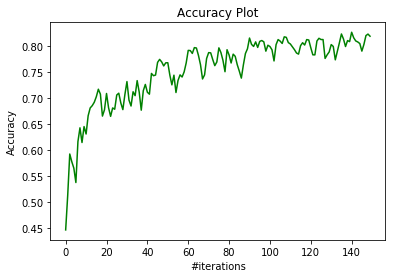

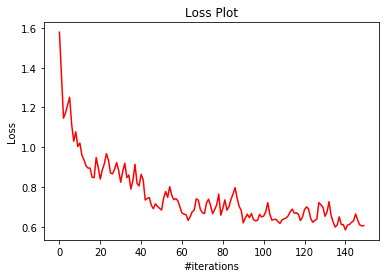

In [0]:
plt.plot(accuracy_lst, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.show()
    
plt.plot(loss_lst, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val.astype(np.float32), Y_val)
print("For unnormalized model -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac)) 

5000/5000 [==============================] - 2s 368us/step
For unnormalized model -->
Validation Loss: 0.6084914556026458
Validation Accuracy: 0.8208


### ii. Normalize the dataset to range (0,1). Compare both the normalized and unnormalized models in terms of training time and accuracy -->

In [0]:
#normalized (range :(0,1))

X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0
X_val_norm = X_val / 255.0

hidden_units = 32
output_units = 10
learn_rate = 0.1
iterations = 150

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 9s - loss: 0.6334 - acc: 0.8491
Epoch 2/150
 - 8s - loss: 0.3061 - acc: 0.9142
Epoch 3/150
 - 8s - loss: 0.2559 - acc: 0.9272
Epoch 4/150
 - 8s - loss: 0.2263 - acc: 0.9361
Epoch 5/150
 - 8s - loss: 0.2047 - acc: 0.9425
Epoch 6/150
 - 8s - loss: 0.1889 - acc: 0.9471
Epoch 7/150
 - 8s - loss: 0.1763 - acc: 0.9499
Epoch 8/150
 - 8s - loss: 0.1656 - acc: 0.9528
Epoch 9/150
 - 8s - loss: 0.1567 - acc: 0.9542
Epoch 10/150
 - 8s - loss: 0.1488 - acc: 0.9567
Epoch 11/150
 - 8s - loss: 0.1418 - acc: 0.9588
Epoch 12/150
 - 8s - loss: 0.1360 - acc: 0.9608
Epoch 13/150
 - 8s - loss: 0.1307 - acc: 0.9619
Epoch 14/150
 - 8s - loss: 0.1262 - acc: 0.9631
Epoch 15/150
 - 11s - loss: 0.1217 - acc: 0.9649
Epoch 16/150
 - 10s - loss: 0.1177 - acc: 0.9658
Epoch 17/150
 - 10s - loss: 0.1141 - acc: 0.9672
Epoch 18/150
 - 8s - loss: 0.1105 - acc: 0.9685
Epoch 19/150
 - 8s - loss: 0.1076 - acc: 0.9688
Epoch 20/150
 - 9s - loss: 0.1045 - acc: 0.9701
Epoch 21/150
 - 8s - loss: 0.1019 - acc: 0.971

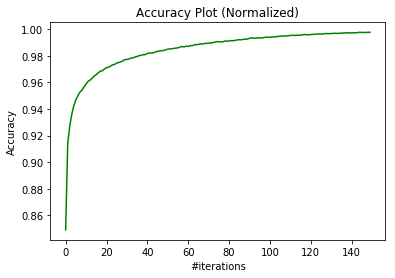

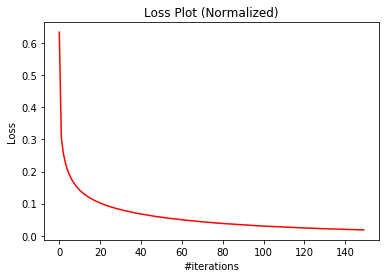

In [0]:
accuracy_lst_norm = epoc_norm.history['acc']
loss_lst_norm = epoc_norm.history['loss']

plt.plot(accuracy_lst_norm, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized)')
plt.show()
    
plt.plot(loss_lst_norm, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized)')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac)) 

5000/5000 [==============================] - 2s 364us/step
For normalized model -->
Validation Loss: 0.15782773262877017
Validation Accuracy: 0.963


#### SUMMARY :
Unnormalized model: </br>
    i. Training time (int average for each epoch) : 8s</br>
    ii. Accuracy (validation dataset) : 82.7%</br>
    
Normalized model:</br>
    i. Training time (int average for each epoch) : 10s</br>
    ii. Accuracy (validation dataset) : 96.4%</br>

Unnormalized model: 
    i. Training time (int average for each epoch) : 8s
    ii. Accuracy (validation dataset) : 82.7%
Normalized model:
    i. Training time (int average for each epoch) : 10s
    ii. Accuracy (validation dataset) : 96.4%

#### CONCLUSION :
Normalized model takes more time for training, but it gives out expectionally well accuracy as compared to unnormalized model, keeping the same hyperparameters. Moreover the learning curve for normalized model is more smoother(increasing curve for accuracy) as compared to the unnormalized model learning curve. This can be because upon normalization the values comes in same range and hence it becomes easy for model to train in similar ranges.

Normalized model takes more time for training, but it gives out expectionally well accuracy as compared to unnormalized model, keeping the same hyperparameters. Moreover the learning curve for normalized model is more smoother(increasing curve for accuracy) as compared to the unnormalized model learning curve. This can be because upon normalization the values comes in same range and hence it becomes easy for model to train in similar ranges.

### iii. Choose the best performing model among (i) and (ii). Train different models by varying the number of hidden layers in the model as 2 and 3. Record the observations. Other hyperparameters are same as in (i) -->
#### NOTE: So, we will be taking the normalized model according to the previous summary.

In [0]:
#normalized (range :(0,1)), no. of hidden layers = 2 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),    
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm2 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 11s - loss: 1.1044 - acc: 0.6908
Epoch 2/150
 - 10s - loss: 0.3905 - acc: 0.8917
Epoch 3/150
 - 9s - loss: 0.2935 - acc: 0.9166
Epoch 4/150
 - 9s - loss: 0.2464 - acc: 0.9299
Epoch 5/150
 - 9s - loss: 0.2144 - acc: 0.9389
Epoch 6/150
 - 9s - loss: 0.1904 - acc: 0.9451
Epoch 7/150
 - 9s - loss: 0.1726 - acc: 0.9501
Epoch 8/150
 - 9s - loss: 0.1574 - acc: 0.9547
Epoch 9/150
 - 9s - loss: 0.1461 - acc: 0.9575
Epoch 10/150
 - 9s - loss: 0.1361 - acc: 0.9612
Epoch 11/150
 - 9s - loss: 0.1276 - acc: 0.9630
Epoch 12/150
 - 9s - loss: 0.1204 - acc: 0.9645
Epoch 13/150
 - 9s - loss: 0.1139 - acc: 0.9669
Epoch 14/150
 - 10s - loss: 0.1083 - acc: 0.9681
Epoch 15/150
 - 9s - loss: 0.1034 - acc: 0.9699
Epoch 16/150
 - 9s - loss: 0.0992 - acc: 0.9711
Epoch 17/150
 - 9s - loss: 0.0953 - acc: 0.9726
Epoch 18/150
 - 9s - loss: 0.0915 - acc: 0.9731
Epoch 19/150
 - 9s - loss: 0.0878 - acc: 0.9748
Epoch 20/150
 - 9s - loss: 0.0848 - acc: 0.9756
Epoch 21/150
 - 9s - loss: 0.0818 - acc: 0.976

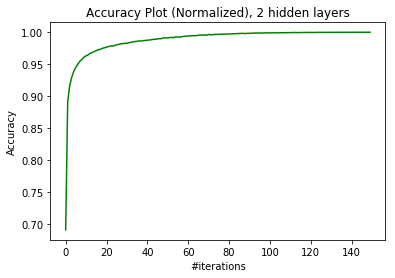

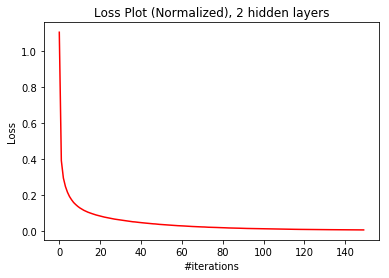

In [0]:
accuracy_lst_norm2 = epoc_norm2.history['acc']
loss_lst_norm2 = epoc_norm2.history['loss']

plt.plot(accuracy_lst_norm2, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 2 hidden layers')
plt.show()
    
plt.plot(loss_lst_norm2, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 2 hidden layers')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 2 hidden layers -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac))

5000/5000 [==============================] - 2s 343us/step
For normalized model -->
Validation Loss: 0.20587815841501578
Validation Accuracy: 0.959


In [0]:
#normalized (range :(0,1)), no. of hidden layers = 3

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),    
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),    
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm3 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 15s - loss: 1.9262 - acc: 0.3180
Epoch 2/150
 - 11s - loss: 0.7452 - acc: 0.7731
Epoch 3/150
 - 11s - loss: 0.4356 - acc: 0.8842
Epoch 4/150
 - 11s - loss: 0.3114 - acc: 0.9151
Epoch 5/150
 - 10s - loss: 0.2439 - acc: 0.9331
Epoch 6/150
 - 11s - loss: 0.2039 - acc: 0.9427
Epoch 7/150
 - 11s - loss: 0.1781 - acc: 0.9497
Epoch 8/150
 - 13s - loss: 0.1594 - acc: 0.9542
Epoch 9/150
 - 10s - loss: 0.1461 - acc: 0.9587
Epoch 10/150
 - 10s - loss: 0.1344 - acc: 0.9607
Epoch 11/150
 - 9s - loss: 0.1264 - acc: 0.9633
Epoch 12/150
 - 13s - loss: 0.1180 - acc: 0.9659
Epoch 13/150
 - 12s - loss: 0.1111 - acc: 0.9679
Epoch 14/150
 - 10s - loss: 0.1045 - acc: 0.9697
Epoch 15/150
 - 11s - loss: 0.0995 - acc: 0.9709
Epoch 16/150
 - 11s - loss: 0.0947 - acc: 0.9725
Epoch 17/150
 - 11s - loss: 0.0895 - acc: 0.9746
Epoch 18/150
 - 12s - loss: 0.0861 - acc: 0.9760
Epoch 19/150
 - 12s - loss: 0.0820 - acc: 0.9762
Epoch 20/150
 - 11s - loss: 0.0795 - acc: 0.9764
Epoch 21/150
 - 10s - loss: 0.

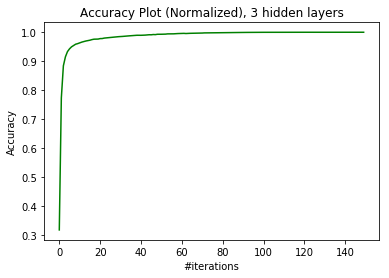

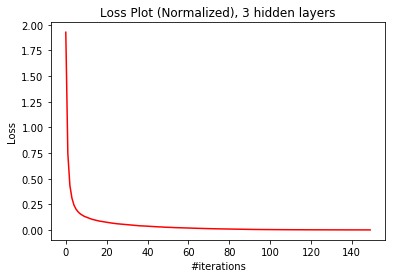

In [0]:
accuracy_lst_norm3 = epoc_norm3.history['acc']
loss_lst_norm3 = epoc_norm3.history['loss']

plt.plot(accuracy_lst_norm3, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 3 hidden layers')
plt.show()
    
plt.plot(loss_lst_norm3, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 3 hidden layers')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 3 hidden layers -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac))

5000/5000 [==============================] - 2s 344us/step
For normalized model, with 2 hidden layers -->
Validation Loss: 0.2357551590288116
Validation Accuracy: 0.9618


#### SUMMARY :</br>

Normalized model, 1 hidden layer: </br>
    i. Loss : 0.147</br>
    ii. Accuracy (validation dataset) : 96.4%</br>
    
Normalized model, 2 hidden layers:</br>
    i. Loss : 0.205</br>
    ii. Accuracy (validation dataset) : 95.9%</br>
    
Normalized model, 3 hidden layers:</br>
    i. Loss : 0.203</br>
    ii. Accuracy (validation dataset) : 96.2%    </br>

Normalized model, 1 hidden layer: 
    i. Loss : 0.147
    ii. Accuracy (validation dataset) : 96.4%
Normalized model, 2 hidden layers:
    i. Loss : 0.205
    ii. Accuracy (validation dataset) : 95.9%
Normalized model, 3 hidden layers:
    i. Loss : 0.203
    ii. Accuracy (validation dataset) : 96.2%    

#### CONCLUSION :
All the normalized models (with 1,2,3 hidden layers) have nearly same accuracy with common set of hyperparameters. But the model with 1 hidden layer has pretty good accuracy over the other two models. Ideally complex networks should work better, but if we run them for more iterations they can even start overfitting the training data, and hence give less accuracy for the cross validation dataset.

NOTE: Here in this case, these models have very close accuracy, and hence slight change in hyperparameters like no. of epochs can change the best suitable model. The reason can be overfitting, etc. 

All the normalized models (with 1,2,3 hidden layers) have nearly same accuracy with common set of hyperparameters. But the model with 1 hidden layer has pretty good accuracy over the other two models. Ideally complex networks should work better, but if we run them for more iterations they can even start overfitting the training data, and hence give less accuracy for the cross validation dataset.

NOTE: Here in this case, these models have very close accuracy, and hence slight change in hyperparameters like no. of epochs can change the best suitable model. The reason can be overfitting, etc. 

### iv. Choose the best performing model in (iii). Train models by varying the learning rates as 0.001 and 0.0001 and record your observations -->
#### NOTE: So, we will be taking the normalized model, with 1 hidden layer according to the previous summary.

In [0]:
#normalized (range :(0,1)), 1 hidden layer, learning rate = 0.001

learn_rate = 0.001

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm1 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 9s - loss: 2.2567 - acc: 0.1682
Epoch 2/150
 - 8s - loss: 2.0915 - acc: 0.5466
Epoch 3/150
 - 8s - loss: 1.9590 - acc: 0.6131
Epoch 4/150
 - 8s - loss: 1.8325 - acc: 0.6503
Epoch 5/150
 - 8s - loss: 1.7113 - acc: 0.6771
Epoch 6/150
 - 8s - loss: 1.5968 - acc: 0.7026
Epoch 7/150
 - 8s - loss: 1.4903 - acc: 0.7213
Epoch 8/150
 - 13s - loss: 1.3929 - acc: 0.7370
Epoch 9/150
 - 10s - loss: 1.3050 - acc: 0.7518
Epoch 10/150
 - 11s - loss: 1.2264 - acc: 0.7650
Epoch 11/150
 - 8s - loss: 1.1567 - acc: 0.7747
Epoch 12/150
 - 8s - loss: 1.0949 - acc: 0.7853
Epoch 13/150
 - 8s - loss: 1.0400 - acc: 0.7938
Epoch 14/150
 - 8s - loss: 0.9913 - acc: 0.8016
Epoch 15/150
 - 8s - loss: 0.9479 - acc: 0.8076
Epoch 16/150
 - 8s - loss: 0.9090 - acc: 0.8138
Epoch 17/150
 - 8s - loss: 0.8741 - acc: 0.8188
Epoch 18/150
 - 8s - loss: 0.8424 - acc: 0.8234
Epoch 19/150
 - 9s - loss: 0.8138 - acc: 0.8288
Epoch 20/150
 - 9s - loss: 0.7876 - acc: 0.8328
Epoch 21/150
 - 10s - loss: 0.7637 - acc: 0.83

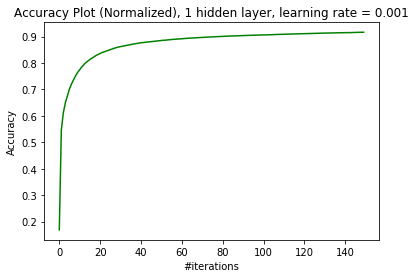

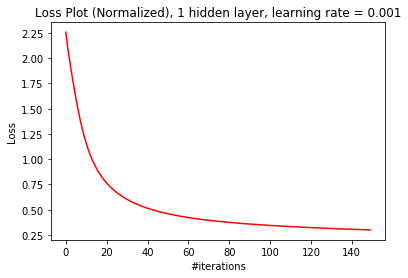

In [0]:
accuracy_lst_norm1 = epoc_norm1.history['acc']
loss_lst_norm1 = epoc_norm1.history['loss']

plt.plot(accuracy_lst_norm1, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 1 hidden layer, learning rate = 0.001')
plt.show()
    
plt.plot(loss_lst_norm1, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 1 hidden layer, learning rate = 0.001')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 1 hidden layer, learning rate = 0.001 -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac)) 

5000/5000 [==============================] - 1s 137us/step
For normalized model, with 1 hidden layer, learning rate = 0.001 -->
Validation Loss: 0.3240294250011444
Validation Accuracy: 0.9102


In [0]:
#normalized (range :(0,1)), 1 hidden layer, learning rate = 0.0001

learn_rate = 0.0001

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm1 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 8s - loss: 2.5214 - acc: 0.0874
Epoch 2/150
 - 7s - loss: 2.4327 - acc: 0.0947
Epoch 3/150
 - 7s - loss: 2.3710 - acc: 0.1045
Epoch 4/150
 - 7s - loss: 2.3251 - acc: 0.1175
Epoch 5/150
 - 7s - loss: 2.2889 - acc: 0.1369
Epoch 6/150
 - 7s - loss: 2.2590 - acc: 0.1599
Epoch 7/150
 - 7s - loss: 2.2334 - acc: 0.1871
Epoch 8/150
 - 7s - loss: 2.2107 - acc: 0.2177
Epoch 9/150
 - 7s - loss: 2.1901 - acc: 0.2476
Epoch 10/150
 - 7s - loss: 2.1709 - acc: 0.2771
Epoch 11/150
 - 7s - loss: 2.1528 - acc: 0.3067
Epoch 12/150
 - 7s - loss: 2.1355 - acc: 0.3404
Epoch 13/150
 - 7s - loss: 2.1188 - acc: 0.3766
Epoch 14/150
 - 8s - loss: 2.1025 - acc: 0.4124
Epoch 15/150
 - 8s - loss: 2.0865 - acc: 0.4417
Epoch 16/150
 - 7s - loss: 2.0708 - acc: 0.4673
Epoch 17/150
 - 7s - loss: 2.0554 - acc: 0.4904
Epoch 18/150
 - 7s - loss: 2.0401 - acc: 0.5092
Epoch 19/150
 - 7s - loss: 2.0250 - acc: 0.5247
Epoch 20/150
 - 7s - loss: 2.0101 - acc: 0.5385
Epoch 21/150
 - 7s - loss: 1.9953 - acc: 0.5503
E

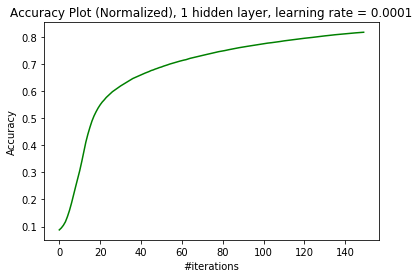

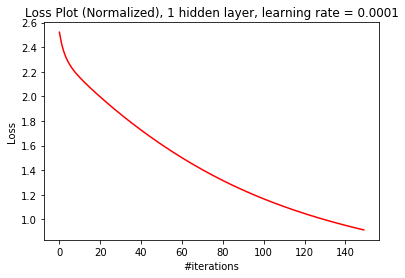

In [0]:
accuracy_lst_norm1 = epoc_norm1.history['acc']
loss_lst_norm1 = epoc_norm1.history['loss']

plt.plot(accuracy_lst_norm1, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 1 hidden layer, learning rate = 0.0001')
plt.show()
    
plt.plot(loss_lst_norm1, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 1 hidden layer, learning rate = 0.0001')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 1 hidden layer, learning rate = 0.0001 -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac)) 

5000/5000 [==============================] - 1s 143us/step
For normalized model, with 1 hidden layer, learning rate = 0.0001 -->
Validation Loss: 0.921219932937622
Validation Accuracy: 0.8178


#### SUMMARY :</br>

Normalized model, 1 hidden layer, learning rate = 0.1 : </br>
    i. Loss : 0.147</br>
    ii. Accuracy (validation dataset) : 96.4%</br>
    
Normalized model, 1 hidden layers, learning rate = 0.001 :</br>
    i. Loss : 0.324</br>
    ii. Accuracy (validation dataset) : 91.0%</br>
    
Normalized model, 1 hidden layer, learning rate = 0.0001 :</br>
    i. Loss : 0.92</br>
    ii. Accuracy (validation dataset) : 81.8%    </br>

Normalized model, 1 hidden layer, learning rate = 0.1 : 
    i. Loss : 0.147
    ii. Accuracy (validation dataset) : 96.4%
Normalized model, 1 hidden layers, learning rate = 0.001 :
    i. Loss : 0.324
    ii. Accuracy (validation dataset) : 91.0%
Normalized model, 1 hidden layer, learning rate = 0.0001 :
    i. Loss : 0.92
    ii. Accuracy (validation dataset) : 81.8%    

#### CONCLUSION :
Normalized models, with 1 hidden layer, 0.1 learning rate has best accuracy (on validation dataset) and least loss with common set of hyperparameters. The reason is beacuse no. of epochs were not sufficient for alpha = 0.001, 0.0001 to reach the minimum loss that they can achieve.

NOTE: Here in this case, slight change in hyperparameters like no. of epochs can change the best suitable model. The reason can be: not reaching the minima of loss curve due to lack of no. of iterations for lesser learning rates, etc. 

Normalized models, with 1 hidden layer, 0.1 learning rate has best accuracy (on validation dataset) and least loss with common set of hyperparameters. The reason is beacuse no. of epochs were not sufficient for alpha = 0.001, 0.0001 to reach the minimum loss that they can achieve.

NOTE: Here in this case, slight change in hyperparameters like no. of epochs can change the best suitable model. The reason can be: not reaching the minima of loss curve due to lack of no. of iterations for lesser learning rates, etc. 

### v. Choose the best performing model in (iv). Train models by varying the number of nodes in each hidden layer to 64 and 128 -->
#### NOTE: So, we will be taking the normalized model, with 1 hidden layer, learning rate = 0.1, according to the previous summary.

In [0]:
#normalized (range :(0,1)), 1 hidden layer, learning rate = 0.1, #hidden_units = 64

hidden_units = 64
output_units = 10
learn_rate = 0.1
iterations = 150

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm1 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 9s - loss: 0.5819 - acc: 0.8532
Epoch 2/150
 - 8s - loss: 0.2992 - acc: 0.9148
Epoch 3/150
 - 8s - loss: 0.2532 - acc: 0.9272
Epoch 4/150
 - 9s - loss: 0.2225 - acc: 0.9360
Epoch 5/150
 - 8s - loss: 0.1982 - acc: 0.9436
Epoch 6/150
 - 9s - loss: 0.1800 - acc: 0.9481
Epoch 7/150
 - 9s - loss: 0.1647 - acc: 0.9527
Epoch 8/150
 - 10s - loss: 0.1522 - acc: 0.9560
Epoch 9/150
 - 9s - loss: 0.1415 - acc: 0.9597
Epoch 10/150
 - 10s - loss: 0.1324 - acc: 0.9621
Epoch 11/150
 - 9s - loss: 0.1243 - acc: 0.9644
Epoch 12/150
 - 9s - loss: 0.1174 - acc: 0.9667
Epoch 13/150
 - 9s - loss: 0.1111 - acc: 0.9695
Epoch 14/150
 - 9s - loss: 0.1055 - acc: 0.9706
Epoch 15/150
 - 8s - loss: 0.1003 - acc: 0.9721
Epoch 16/150
 - 9s - loss: 0.0954 - acc: 0.9737
Epoch 17/150
 - 9s - loss: 0.0911 - acc: 0.9745
Epoch 18/150
 - 10s - loss: 0.0872 - acc: 0.9759
Epoch 19/150
 - 10s - loss: 0.0836 - acc: 0.9770
Epoch 20/150
 - 10s - loss: 0.0800 - acc: 0.9778
Epoch 21/150
 - 9s - loss: 0.0770 - acc: 0.9

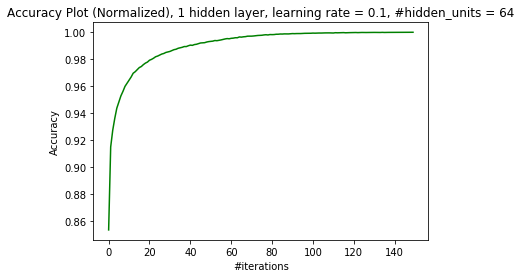

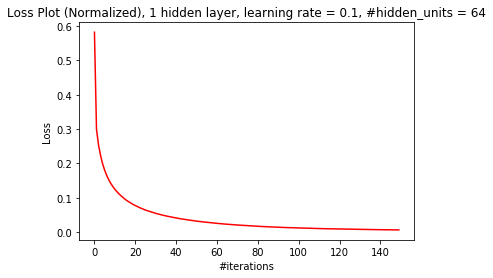

In [0]:
accuracy_lst_norm1 = epoc_norm1.history['acc']
loss_lst_norm1 = epoc_norm1.history['loss']

plt.plot(accuracy_lst_norm1, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 64')
plt.show()
    
plt.plot(loss_lst_norm1, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 64')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 64 -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac)) 

5000/5000 [==============================] - 1s 142us/step
For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 64 -->
Validation Loss: 0.10702272575348616
Validation Accuracy: 0.9744


In [0]:
#normalized (range :(0,1)), 1 hidden layer, learning rate = 0.1, #hidden_units = 128

hidden_units = 128
output_units = 10
learn_rate = 0.1
iterations = 150

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm1 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 12s - loss: 0.5513 - acc: 0.8570
Epoch 2/150
 - 10s - loss: 0.3041 - acc: 0.9116
Epoch 3/150
 - 10s - loss: 0.2631 - acc: 0.9236
Epoch 4/150
 - 10s - loss: 0.2328 - acc: 0.9318
Epoch 5/150
 - 10s - loss: 0.2069 - acc: 0.9407
Epoch 6/150
 - 10s - loss: 0.1869 - acc: 0.9458
Epoch 7/150
 - 10s - loss: 0.1696 - acc: 0.9511
Epoch 8/150
 - 10s - loss: 0.1551 - acc: 0.9554
Epoch 9/150
 - 10s - loss: 0.1427 - acc: 0.9588
Epoch 10/150
 - 10s - loss: 0.1324 - acc: 0.9617
Epoch 11/150
 - 10s - loss: 0.1233 - acc: 0.9645
Epoch 12/150
 - 11s - loss: 0.1152 - acc: 0.9673
Epoch 13/150
 - 10s - loss: 0.1082 - acc: 0.9688
Epoch 14/150
 - 10s - loss: 0.1020 - acc: 0.9710
Epoch 15/150
 - 10s - loss: 0.0965 - acc: 0.9726
Epoch 16/150
 - 10s - loss: 0.0911 - acc: 0.9742
Epoch 17/150
 - 10s - loss: 0.0865 - acc: 0.9752
Epoch 18/150
 - 10s - loss: 0.0822 - acc: 0.9764
Epoch 19/150
 - 10s - loss: 0.0781 - acc: 0.9781
Epoch 20/150
 - 10s - loss: 0.0744 - acc: 0.9794
Epoch 21/150
 - 10s - loss: 0

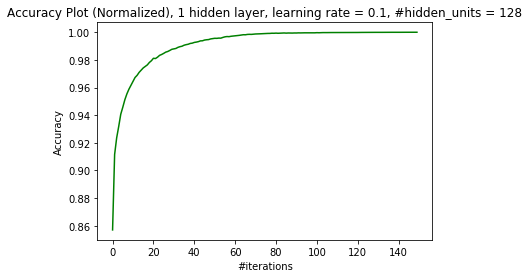

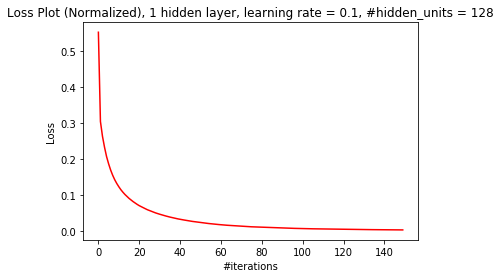

In [0]:
accuracy_lst_norm1 = epoc_norm1.history['acc']
loss_lst_norm1 = epoc_norm1.history['loss']

plt.plot(accuracy_lst_norm1, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 128')
plt.show()
    
plt.plot(loss_lst_norm1, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 128')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128 -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac)) 

5000/5000 [==============================] - 1s 135us/step
For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128 -->
Validation Loss: 0.0881890373039525
Validation Accuracy: 0.9758


#### SUMMARY :
</br>
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 32 : </br>
    i. Loss : 0.147</br>
    ii. Accuracy (validation dataset) : 96.4%</br>
    
Normalized model, 1 hidden layers, learning rate = 0.1, #hidden_units = 64 :</br>
    i. Loss : 0.107</br>
    ii. Accuracy (validation dataset) : 97.4%</br>
    
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128 :</br>
    i. Loss : 0.088</br>
    ii. Accuracy (validation dataset) : 97.6%  </br>

Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 32 : 
    i. Loss : 0.147
    ii. Accuracy (validation dataset) : 96.4%
Normalized model, 1 hidden layers, learning rate = 0.1, #hidden_units = 64 :
    i. Loss : 0.107
    ii. Accuracy (validation dataset) : 97.4%
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128 :
    i. Loss : 0.088
    ii. Accuracy (validation dataset) : 97.6%    

#### CONCLUSION :
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128 works better than having 32, 64 hidden units in the hidden layer. This was dezired result because, as we increase the complexity of network, we are able to learn more complex functions, more easily.

Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128 works better than having 32, 64 hidden units in the hidden layer. This was dezired result because, as we increase the complexity of network, we are able to learn more complex functions, more easily.

### vi. Choose the best performing model in (v). Train models by varying the activation functions in each of the hidden layers to tanh, relu and leaky relu and record your observations -->
#### NOTE: So, we will be taking the normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, according to the previous summary.

In [0]:
#normalized (range :(0,1)), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = tanh

hidden_units = 128
output_units = 10
learn_rate = 0.1
iterations = 150

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.tanh),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm1 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 13s - loss: 0.3329 - acc: 0.9043
Epoch 2/150
 - 11s - loss: 0.1884 - acc: 0.9453
Epoch 3/150
 - 14s - loss: 0.1377 - acc: 0.9601
Epoch 4/150
 - 12s - loss: 0.1093 - acc: 0.9685
Epoch 5/150
 - 10s - loss: 0.0898 - acc: 0.9740
Epoch 6/150
 - 10s - loss: 0.0760 - acc: 0.9779
Epoch 7/150
 - 11s - loss: 0.0654 - acc: 0.9815
Epoch 8/150
 - 10s - loss: 0.0567 - acc: 0.9839
Epoch 9/150
 - 10s - loss: 0.0500 - acc: 0.9864
Epoch 10/150
 - 11s - loss: 0.0441 - acc: 0.9879
Epoch 11/150
 - 11s - loss: 0.0391 - acc: 0.9900
Epoch 12/150
 - 11s - loss: 0.0348 - acc: 0.9913
Epoch 13/150
 - 11s - loss: 0.0311 - acc: 0.9923
Epoch 14/150
 - 14s - loss: 0.0275 - acc: 0.9936
Epoch 15/150
 - 11s - loss: 0.0244 - acc: 0.9948
Epoch 16/150
 - 10s - loss: 0.0223 - acc: 0.9956
Epoch 17/150
 - 11s - loss: 0.0198 - acc: 0.9964
Epoch 18/150
 - 10s - loss: 0.0180 - acc: 0.9969
Epoch 19/150
 - 11s - loss: 0.0162 - acc: 0.9973
Epoch 20/150
 - 10s - loss: 0.0148 - acc: 0.9979
Epoch 21/150
 - 10s - loss: 0

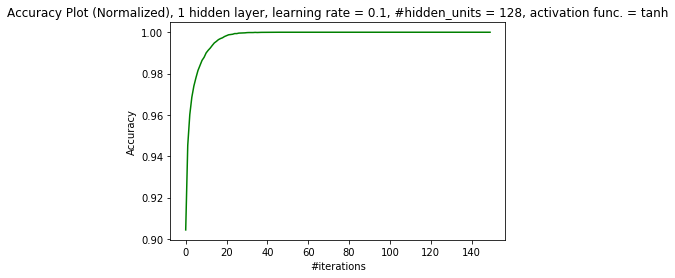

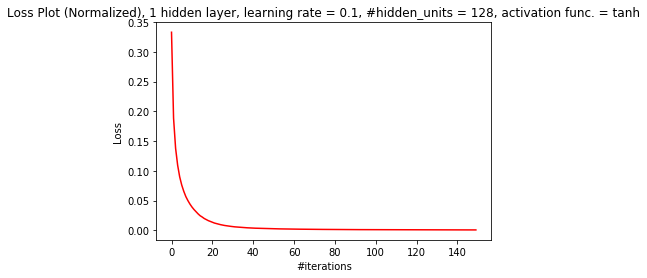

In [0]:
accuracy_lst_norm1 = epoc_norm1.history['acc']
loss_lst_norm1 = epoc_norm1.history['loss']

plt.plot(accuracy_lst_norm1, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = tanh')
plt.show()
    
plt.plot(loss_lst_norm1, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = tanh')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = tanh -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac))

5000/5000 [==============================] - 2s 344us/step
For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = tanh -->
Validation Loss: 0.10680639481237159
Validation Accuracy: 0.975


In [0]:
#normalized (range :(0,1)), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu

hidden_units = 128
output_units = 10
learn_rate = 0.1
iterations = 150

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.relu),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm1 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 17s - loss: 0.3095 - acc: 0.9111
Epoch 2/150
 - 11s - loss: 0.1516 - acc: 0.9556
Epoch 3/150
 - 11s - loss: 0.1090 - acc: 0.9681
Epoch 4/150
 - 11s - loss: 0.0846 - acc: 0.9757
Epoch 5/150
 - 11s - loss: 0.0689 - acc: 0.9805
Epoch 6/150
 - 11s - loss: 0.0576 - acc: 0.9837
Epoch 7/150
 - 11s - loss: 0.0494 - acc: 0.9856
Epoch 8/150
 - 13s - loss: 0.0424 - acc: 0.9881
Epoch 9/150
 - 14s - loss: 0.0364 - acc: 0.9899
Epoch 10/150
 - 13s - loss: 0.0320 - acc: 0.9912
Epoch 11/150
 - 12s - loss: 0.0277 - acc: 0.9931
Epoch 12/150
 - 11s - loss: 0.0233 - acc: 0.9941
Epoch 13/150
 - 11s - loss: 0.0209 - acc: 0.9952
Epoch 14/150
 - 13s - loss: 0.0184 - acc: 0.9958
Epoch 15/150
 - 12s - loss: 0.0159 - acc: 0.9969
Epoch 16/150
 - 12s - loss: 0.0139 - acc: 0.9973
Epoch 17/150
 - 11s - loss: 0.0121 - acc: 0.9980
Epoch 18/150
 - 12s - loss: 0.0107 - acc: 0.9985
Epoch 19/150
 - 13s - loss: 0.0095 - acc: 0.9989
Epoch 20/150
 - 13s - loss: 0.0083 - acc: 0.9991
Epoch 21/150
 - 14s - loss: 0

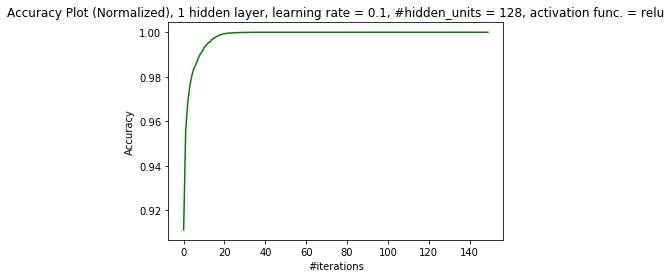

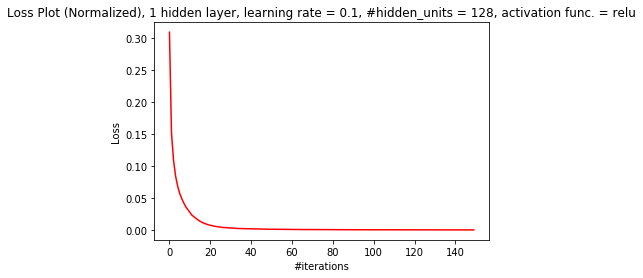

In [0]:
accuracy_lst_norm1 = epoc_norm1.history['acc']
loss_lst_norm1 = epoc_norm1.history['loss']

plt.plot(accuracy_lst_norm1, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu')
plt.show()
    
plt.plot(loss_lst_norm1, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac))

5000/5000 [==============================] - 1s 143us/step
For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu -->
Validation Loss: 0.11216913675212709
Validation Accuracy: 0.9788


In [0]:
#normalized (range :(0,1)), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = leaky_relu

hidden_units = 128
output_units = 10
learn_rate = 0.1
iterations = 150

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm1 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 13s - loss: 0.3270 - acc: 0.9053
Epoch 2/150
 - 12s - loss: 0.1776 - acc: 0.9483
Epoch 3/150
 - 11s - loss: 0.1314 - acc: 0.9614
Epoch 4/150
 - 11s - loss: 0.1056 - acc: 0.9691
Epoch 5/150
 - 11s - loss: 0.0884 - acc: 0.9746
Epoch 6/150
 - 12s - loss: 0.0754 - acc: 0.9783
Epoch 7/150
 - 13s - loss: 0.0656 - acc: 0.9807
Epoch 8/150
 - 11s - loss: 0.0573 - acc: 0.9837
Epoch 9/150
 - 11s - loss: 0.0510 - acc: 0.9849
Epoch 10/150
 - 10s - loss: 0.0453 - acc: 0.9868
Epoch 11/150
 - 12s - loss: 0.0405 - acc: 0.9886
Epoch 12/150
 - 11s - loss: 0.0359 - acc: 0.9896
Epoch 13/150
 - 11s - loss: 0.0324 - acc: 0.9908
Epoch 14/150
 - 11s - loss: 0.0290 - acc: 0.9915
Epoch 15/150
 - 11s - loss: 0.0256 - acc: 0.9935
Epoch 16/150
 - 11s - loss: 0.0229 - acc: 0.9942
Epoch 17/150
 - 11s - loss: 0.0207 - acc: 0.9949
Epoch 18/150
 - 13s - loss: 0.0181 - acc: 0.9960
Epoch 19/150
 - 12s - loss: 0.0167 - acc: 0.9963
Epoch 20/150
 - 11s - loss: 0.0149 - acc: 0.9970
Epoch 21/150
 - 11s - loss: 0

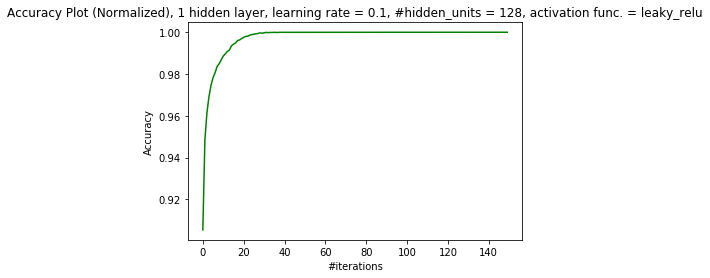

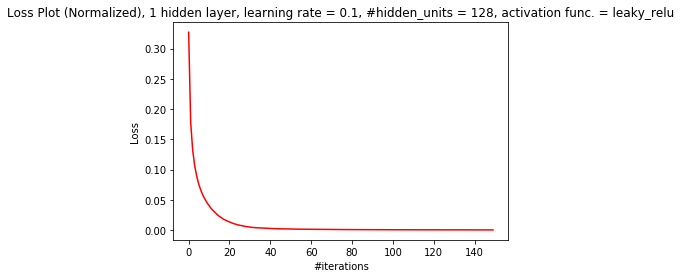

In [0]:
accuracy_lst_norm1 = epoc_norm1.history['acc']
loss_lst_norm1 = epoc_norm1.history['loss']

plt.plot(accuracy_lst_norm1, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = leaky_relu')
plt.show()
    
plt.plot(loss_lst_norm1, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot (Normalized), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = leaky_relu')
plt.show()

In [0]:
lo, ac = model.evaluate(X_val_norm.astype(np.float32), Y_val)
print("For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = leaky_relu -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac))

5000/5000 [==============================] - 5s 924us/step
For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = leaky_relu -->
Validation Loss: 0.12885858635277256
Validation Accuracy: 0.975


#### SUMMARY :</br>

Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = sigmoid :</br>
    i. Loss : 0.088</br>
    ii. Accuracy (validation dataset) : 97.6% </br>
    
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = tanh :</br>
    i. Loss : 0.106</br>
    ii. Accuracy (validation dataset) : 97.5% </br>
    
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu :</br>
    i. Loss : 0.112</br>
    ii. Accuracy (validation dataset) : 97.9% </br>
    
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = leaky_relu :</br>
    i. Loss : 0.129</br>
    ii. Accuracy (validation dataset) : 97.5% </br>

Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = sigmoid :
    i. Loss : 0.088
    ii. Accuracy (validation dataset) : 97.6% 
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = tanh :
    i. Loss : 0.106
    ii. Accuracy (validation dataset) : 97.5% 
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu :
    i. Loss : 0.112
    ii. Accuracy (validation dataset) : 97.9% 
Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = leaky_relu :
    i. Loss : 0.129
    ii. Accuracy (validation dataset) : 97.5% 

#### CONCLUSION :
Loss was minimum for sigmoid activation function, but accuracy is more for relu function. So we choose relu as better activation function than sigmoid as the error decreased to e-4 in early epochs itself while using relu while that was not the case for sigmoid, for training data.

Loss was minimum for sigmoid activation function, but accuracy is more for relu function. So we choose relu as better activation function than sigmoid as the error decreased to e-4 in early epochs itself while using relu while that was not the case for sigmoid, for training data.

### vii. Among all the configurations of hyper-parameters that you trained above, which setting is best. How did you decide which setting is better? -->
                                                   &&
### viii. Among all the models trained above, how will you choose the best model? Which is the best model? -->                                         

## BEST MODEL :
### Normalized model, 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu, 150 epochs, SGD optimizer

In [0]:
#normalized (range :(0,1)), 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu

hidden_units = 128
output_units = 10
learn_rate = 0.1
iterations = 150

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_units, activation = tf.nn.relu),
    tf.keras.layers.Dense(output_units, activation = tf.nn.softmax)
])

# Stochastic Gradient Descent optimizer (SGD)
opt = tf.keras.optimizers.SGD(learn_rate)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc_norm1 = model.fit(X_train_norm.astype(np.float32), Y_train, epochs = iterations, verbose=2)

Epoch 1/150
 - 17s - loss: 0.3031 - acc: 0.9123
Epoch 2/150
 - 15s - loss: 0.1459 - acc: 0.9582
Epoch 3/150
 - 12s - loss: 0.1044 - acc: 0.9699
Epoch 4/150
 - 13s - loss: 0.0818 - acc: 0.9756
Epoch 5/150
 - 14s - loss: 0.0675 - acc: 0.9797
Epoch 6/150
 - 13s - loss: 0.0566 - acc: 0.9835
Epoch 7/150
 - 12s - loss: 0.0480 - acc: 0.9858
Epoch 8/150
 - 12s - loss: 0.0413 - acc: 0.9881
Epoch 9/150
 - 12s - loss: 0.0358 - acc: 0.9907
Epoch 10/150
 - 12s - loss: 0.0309 - acc: 0.9916
Epoch 11/150
 - 13s - loss: 0.0268 - acc: 0.9933
Epoch 12/150
 - 12s - loss: 0.0239 - acc: 0.9937
Epoch 13/150
 - 12s - loss: 0.0204 - acc: 0.9955
Epoch 14/150
 - 13s - loss: 0.0181 - acc: 0.9963
Epoch 15/150
 - 12s - loss: 0.0156 - acc: 0.9971
Epoch 16/150
 - 13s - loss: 0.0139 - acc: 0.9977
Epoch 17/150
 - 12s - loss: 0.0120 - acc: 0.9982
Epoch 18/150
 - 12s - loss: 0.0109 - acc: 0.9983
Epoch 19/150
 - 12s - loss: 0.0095 - acc: 0.9989
Epoch 20/150
 - 13s - loss: 0.0083 - acc: 0.9991
Epoch 21/150
 - 12s - loss: 0

In [0]:
lo, ac = model.evaluate(X_test_norm.astype(np.float32), Y_test)
print("For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu -->")
print("Validation Loss: {}".format(lo))
print("Validation Accuracy: {}".format(ac))

10000/10000 [==============================] - 3s 301us/step
For normalized model, with 1 hidden layer, learning rate = 0.1, #hidden_units = 128, activation func. = relu -->
Validation Loss: 0.08782856889604536
Validation Accuracy: 0.9812


From the above evaluation on the test dataset with high accuracy = 98.12%, it is confirmed that this a good model with best hyperparameter settings used, because it runs relevently nice on a new big enough dataset with maintained accuracy and loss ratio. This means that this model can give out a high F-score which shows that it classifies the images into numbers with less variance, less bias.

The reason to choose this setting is:
These settings gives the maximum accuracy and least loss on new dataset(validation & test), after being trained on training dataset. And also we have considered that no overfitting and no bias setting is there, which makes this model more suitable to run for the type of dataset provided.

From the above evaluation on the test dataset with high accuracy = 98.12%, it is confirmed that this a good model with best hyperparameter settings used, because it runs relevently nice on a new big enough dataset with maintained accuracy and loss ratio. This means that this model can give out a high F-score which shows that it classifies the images into numbers with less variance, less bias.
</br>

The reason to choose this setting is:
These settings gives the maximum accuracy and least loss on new dataset(validation & test), after being trained on training dataset. And also we have considered that no overfitting and no bias setting is there, which makes this model more suitable to run for the type of dataset provided.
</br>

This model is the best suitable model as Stociastic Gradient Descent optimizer ensures good results for small sized (less features due to small image size) datasets and less complex NN. Moreover it involves best suited hyperparameter settings to support the reason for producing such high accuracy on traing, test and cross validation dataset. Moreover the training time for this model is no different from other models.

#### NOTE:  Moreover to verify its relevence we can even check for the "F-score" of each of the models.